[0.]


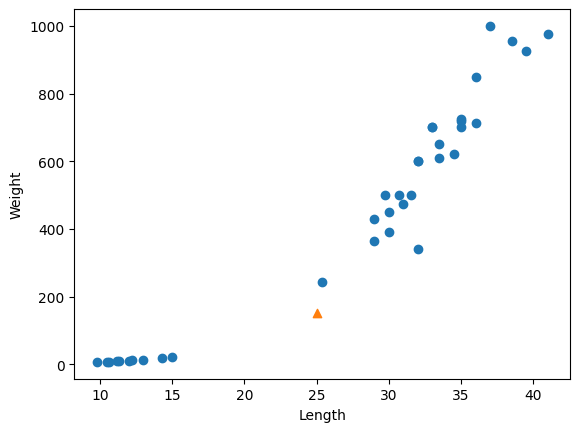

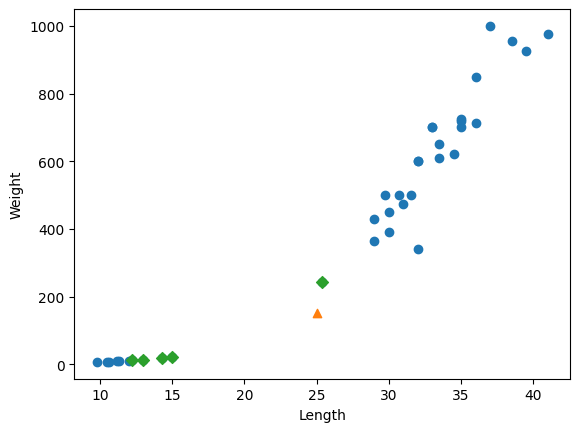

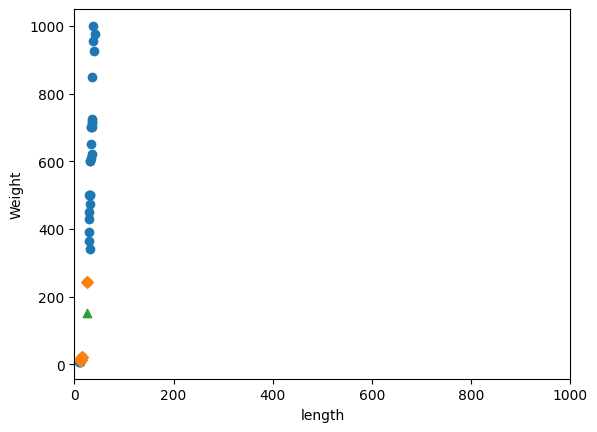

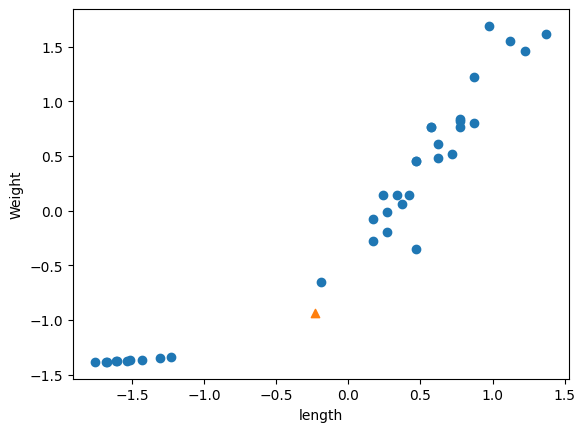

[1.]


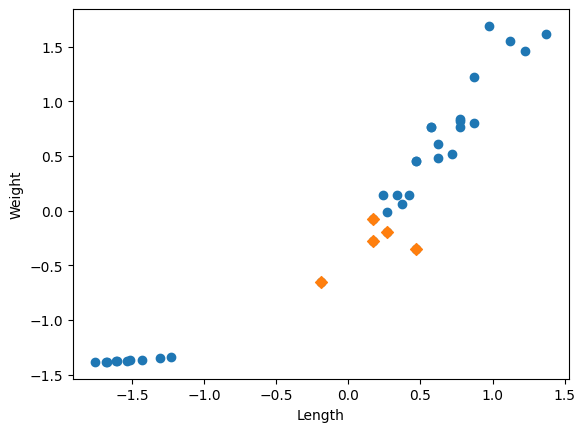

In [ ]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


length=bream_length+smelt_length
weight=bream_weight+smelt_weight

import numpy as np

fish_data=np.column_stack((length,weight))

fish_target=np.concatenate((np.ones(35),np.zeros(14)))

from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(train_input,train_target)
knn.score(test_input,test_target)

print(knn.predict([[25,150]]))

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

distance,index= knn.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[index,0],train_input[index,1], marker="D")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()



plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(train_input[index,0],train_input[index,1],marker="D")
plt.scatter(25,150,marker="^")
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("Weight")
plt.show()



## 데이터 전처리 부분 
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

train_scaled=(train_input-mean)/std

new=([25,150]-mean)/std
## 데이터 전처리 후 훈련데이터 산점도도 그리기
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.xlabel("length")
plt.ylabel("Weight")
plt.show()

knn.fit(train_scaled,train_target)

test_scaled=(test_input-mean)/std

knn.score(test_scaled,test_target)

print(knn.predict([new]))

distance, index=knn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(train_scaled[index,0],train_scaled[index,1],marker="D")

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()


1.0


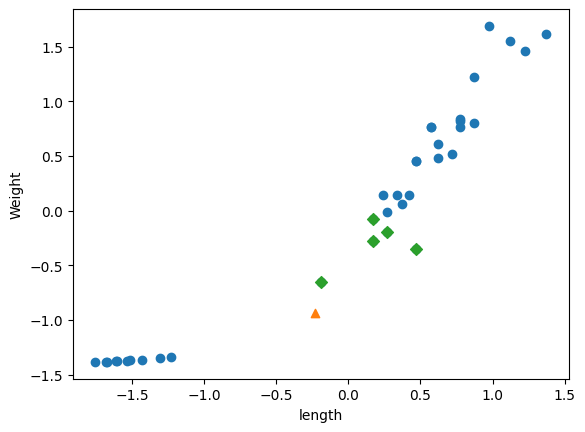

In [ ]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



length=bream_length+smelt_length
weight=bream_weight+smelt_weight


import numpy as np

## 물고기 데이터와 물고기 타겟 값을 배열에 저장
fish_data= np.column_stack((length,weight))
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

## 훈련데이터와 테스트데이터로 나누기
from sklearn.model_selection import train_test_split 
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)


## <전처리 데이터로 모델 훈련하기>

mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

## 표준 점수 구하기 
train_scaled=(train_input-mean)/std
test_scaled=(test_input-mean)/std
new=([25,150]-mean)/std


## 사이킷런으로  전처리된 데이터로 모델 훈련하기
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_scaled,train_target)
print(knn.score(test_scaled,test_target))

distance,index=knn.kneighbors([new]) ## 예측하고자하는 물고기의 데이터 전처리된 데이터값을 k-최근접이웃을 통해 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다

import matplotlib.pyplot as plt

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.scatter(train_scaled[index,0],train_scaled[index,1],marker="D")
plt.xlabel("length")
plt.ylabel("Weight")
plt.show()






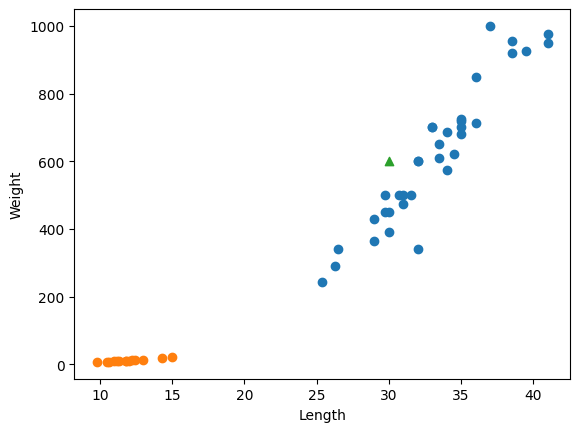

In [5]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



length=bream_length+smelt_length
weight=bream_weight+smelt_weight


#zip으로 데이터 묶기
zip_data=zip(length,weight)

# 싸이킷 런에 사용할 데이터
fish_data=[]
for l,w in zip_data:
    fish_data.append([l,w])

fish_target=[1]*35+[0]*14


from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(fish_data,fish_target)
knn.score(fish_data,fish_target)
knn.predict([[30,600]])


import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker="^")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()








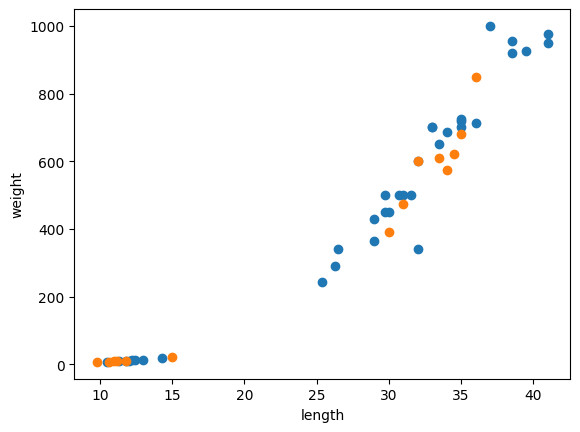

1.0

In [ ]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


length= bream_length+smelt_length
weight=bream_weight+smelt_weight

zip_data=zip(length,weight)

fish_data=[]
for l,w in zip_data:
    fish_data.append([l,w])

fish_target=[1]*35+[0]*14

import numpy as np 

input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

np.random.seed(42)
index=np.arange(49)
np.random.shuffle(index)

train_input=input_arr[index[:35]]
test_input=input_arr[index[35:]]

train_target=target_arr[index[:35]]
test_target=target_arr[index[35:]]


import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_input,train_target)
knn.score(test_input,test_target)




